In [1]:
import numpy as np
import torch
import itertools
import matplotlib.pyplot as plt

from agents.dqn import DoubleDQNAgent
from environment.env import GridEnvDeform
from eval import eval_agent, all_data

In [2]:
# maze size
N = 2

# thetas deformations (range(a,b),range(c,d))
l0 = 1
h0 = 10
l1 = 1
h1 = 10

maze = np.load(f"maze/maze_{N}.npy")
env = GridEnvDeform(maze,l0,h0,l1,h1)

states = [((x,y,phi),(i,j)) for x in range(1,env.max_shape[0]-1) for y in range(1,env.max_shape[1]-1) for phi in range(4) for i in range(l0,h0) for j in range(l1,h1)] 
positions = [(x,y,phi) for x in range(1,env.max_shape[0]-1) for y in range(1,env.max_shape[1]-1) for phi in range(4)]
actions = [0,1,2,3]
obs = list(itertools.product([0,1], repeat=5))
thetas = [(i,j) for i in range(l0,h0) for j in range(l1,h1)]

state_dict = {state: i for i, state in enumerate(states)}
position_dict = {position: i for i, position in enumerate(positions)}
obs_dict = {obs : i for i, obs in enumerate(obs)}

# Actions are: 0-listen, 1-open-left, 2-open-right
lenS = len(states)
lenP = len(positions)
lenA = len(actions)
lenO = len(obs)


# Information Directed Sampling IDS

In [12]:
from agents.infotaxis import IDS, ThetaInfotaxis

agent = IDS(env)
#agent = ThetaInfotaxis(env)

In [13]:
transitions, beliefs = eval_agent("POMDP",agent,env, num_episodes=5,max_episode_steps=30, render=False)

100%|██████████| 5/5 [04:13<00:00, 50.75s/it]


Completed episodes: 0, out of 5


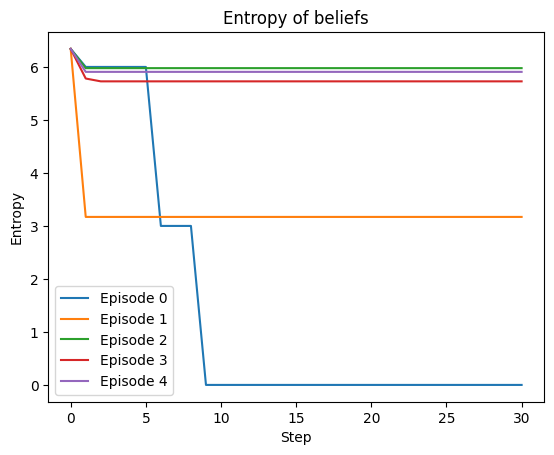

In [14]:
all_data(transitions, beliefs, path="plots/IDS")

In [75]:
import time

# transitions[i] = [(s,a,s',o)....()...] for i-th episode

# replay buffer for episode i = succession of states
episode = 4
replay_episode = [t[0] for t in transitions[episode]] 


env.set_rendering()

for i, s in enumerate(replay_episode):
    env.set_state(s)
    env.render_bis()
    time.sleep(0.5)
    
env.close_render()

error: display Surface quit

# QMDP tabular

In [3]:
# import the MDP solution model (tabular q in this case)
Q = np.load(f"agents/tabularQ_maze_2_100k.npy")

In [4]:
from agents.tabular_qlearning import Q_agent, Thompson_agent
    
qagent = Q_agent(Q,env)
tagent = Thompson_agent(Q,env)


In [5]:
transitions, beliefs = eval_agent("POMDP",tagent ,env, num_episodes=20,max_episode_steps=50,render=True)

  0%|          | 0/20 [00:00<?, ?it/s]

State ((3, 16, 0), (3, 7))
Action:  2
Reward:     -2.0  
Next State:  ((4, 16, 2), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belief entropy:  tensor(3.8712)


State ((4, 16, 2), (3, 7))
Action:  1
Reward:     -4.0  
Next State:  ((4, 15, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0233)
Belief entropy:  tensor(3.7612)


State ((4, 15, 3), (3, 7))
Action:  0
Reward:     -6.0  
Next State:  ((4, 14, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0233)
Belief entropy:  tensor(3.7612)


State ((4, 14, 3), (3, 7))
Action:  0
Reward:     -8.0  
Next State:  ((4, 13, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0294)
Belief entropy:  tensor(3.5264)


State ((4, 13, 3), (3, 7))
Action:  0
Reward:     -10.0  
Next State:  ((4, 12, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0294)
Belief entropy:  tensor(3.5264)


State ((4, 12, 3), (3, 7))
Action:  0
Reward:     -12.0  
Next State:  ((4, 11, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0294)
Belief

  5%|▌         | 1/20 [00:00<00:12,  1.56it/s]

State ((27, 13, 0), (5, 1))
Action:  1
Reward:     -2.0  
Next State:  ((27, 14, 1), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((27, 14, 1), (5, 1))
Action:  0
Reward:     -4.0  
Next State:  ((27, 15, 1), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((27, 15, 1), (5, 1))
Action:  3
Reward:     -6.0  
Next State:  ((26, 15, 0), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((26, 15, 0), (5, 1))
Action:  3
Reward:     -8.0  
Next State:  ((26, 14, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((26, 14, 3), (5, 1))
Action:  0
Reward:     -10.0  
Next State:  ((26, 13, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((26, 13, 3), (5, 1))
Action:  0
Reward:     -12.0  
Next State:  ((26, 12, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.

 10%|█         | 2/20 [00:01<00:15,  1.13it/s]

State ((26, 2, 3), (5, 1))
Action:  0
Reward:     -82.0  
Next State:  ((26, 1, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0154)
Belief entropy:  tensor(4.1744)


State ((26, 1, 3), (5, 1))
Action:  1
Reward:     -84.0  
Next State:  ((25, 1, 0), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((25, 1, 0), (5, 1))
Action:  1
Reward:     -86.0  
Next State:  ((25, 2, 1), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((25, 2, 1), (5, 1))
Action:  2
Reward:     -88.0  
Next State:  ((25, 1, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((25, 1, 3), (5, 1))
Action:  0
Reward:     -90.0  
Next State:  ((25, 1, 3), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((25, 1, 3), (5, 1))
Action:  1
Reward:     -92.0  
Next State:  ((24, 1, 0), (5, 1))
argmax and max Belief:  (1, 1) tensor(0.0159)
Be

 15%|█▌        | 3/20 [00:02<00:10,  1.59it/s]

State ((5, 9, 3), (3, 2))
Action:  0
Reward:     -19.0  
Next State:  ((5, 8, 3), (3, 2))
argmax and max Belief:  (3, 2) tensor(0.0714)
Belief entropy:  tensor(2.6391)


State ((5, 8, 3), (3, 2))
Action:  0
Reward:     -19.5  
Next State:  ((5, 7, 3), (3, 2))
argmax and max Belief:  (3, 2) tensor(1.)
Belief entropy:  tensor(-0.)


State ((5, 7, 3), (3, 2))
Action:  3
Reward:     -20.0  
Next State:  ((6, 7, 2), (3, 2))
argmax and max Belief:  (3, 2) tensor(1.)
Belief entropy:  tensor(-0.)


State ((6, 7, 2), (3, 2))
Action:  3
Reward:     -20.5  
Next State:  ((6, 8, 1), (3, 2))
argmax and max Belief:  (3, 2) tensor(1.)
Belief entropy:  tensor(-0.)


State ((6, 8, 1), (3, 2))
Action:  0
Reward:     -19.5  
Next State:  ((6, 9, 1), (3, 2))
argmax and max Belief:  (3, 2) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 27, 1), (9, 2))
Action:  1
Reward:     -2.0  
Next State:  ((25, 27, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0125)
Belief entropy:  tensor(4.3820)


State

 20%|██        | 4/20 [00:03<00:12,  1.25it/s]

State ((26, 24, 1), (9, 2))
Action:  2
Reward:     -90.0  
Next State:  ((26, 23, 3), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0130)
Belief entropy:  tensor(4.3438)


State ((26, 23, 3), (9, 2))
Action:  1
Reward:     -92.0  
Next State:  ((25, 23, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0130)
Belief entropy:  tensor(4.3438)


State ((25, 23, 0), (9, 2))
Action:  1
Reward:     -94.0  
Next State:  ((25, 24, 1), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0130)
Belief entropy:  tensor(4.3438)


State ((25, 24, 1), (9, 2))
Action:  3
Reward:     -96.0  
Next State:  ((24, 24, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0130)
Belief entropy:  tensor(4.3438)


State ((24, 24, 0), (9, 2))
Action:  2
Reward:     -98.0  
Next State:  ((25, 24, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0130)
Belief entropy:  tensor(4.3438)


State ((25, 24, 2), (9, 2))
Action:  0
Reward:     -100.0  
Next State:  ((26, 24, 2), (9, 2))
argmax and max Belief:  (1, 1) tens

 25%|██▌       | 5/20 [00:03<00:11,  1.35it/s]

State ((11, 22, 3), (6, 3))
Action:  0
Reward:     -48.0  
Next State:  ((11, 21, 3), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((11, 21, 3), (6, 3))
Action:  0
Reward:     -50.0  
Next State:  ((11, 20, 3), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((11, 20, 3), (6, 3))
Action:  0
Reward:     -52.0  
Next State:  ((11, 19, 3), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0175)
Belief entropy:  tensor(4.0431)


State ((11, 19, 3), (6, 3))
Action:  1
Reward:     -54.0  
Next State:  ((10, 19, 0), (6, 3))
argmax and max Belief:  (6, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((10, 19, 0), (6, 3))
Action:  3
Reward:     -56.0  
Next State:  ((10, 18, 3), (6, 3))
argmax and max Belief:  (6, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((10, 18, 3), (6, 3))
Action:  1
Reward:     -55.0  
Next State:  ((9, 18, 0), (6, 3))
argmax and max Belief:  (6, 3) tensor(1.)
Belief en

 30%|███       | 6/20 [00:04<00:09,  1.43it/s]

State ((21, 10, 0), (5, 7))
Action:  1
Reward:     -47.0  
Next State:  ((21, 11, 1), (5, 7))
argmax and max Belief:  (4, 7) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((21, 11, 1), (5, 7))
Action:  0
Reward:     -47.5  
Next State:  ((21, 12, 1), (5, 7))
argmax and max Belief:  (5, 7) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((21, 12, 1), (5, 7))
Action:  0
Reward:     -48.0  
Next State:  ((21, 13, 1), (5, 7))
argmax and max Belief:  (5, 7) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((21, 13, 1), (5, 7))
Action:  0
Reward:     -48.5  
Next State:  ((21, 14, 1), (5, 7))
argmax and max Belief:  (5, 7) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((21, 14, 1), (5, 7))
Action:  0
Reward:     -47.5  
Next State:  ((21, 15, 1), (5, 7))
argmax and max Belief:  (5, 7) tensor(1.)
Belief entropy:  tensor(-0.)


State ((19, 24, 3), (3, 7))
Action:  2
Reward:     -2.0  
Next State:  ((19, 25, 1), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0130

 35%|███▌      | 7/20 [00:05<00:10,  1.22it/s]

State ((11, 15, 0), (3, 7))
Action:  3
Reward:     -92.0  
Next State:  ((11, 14, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief entropy:  tensor(3.9318)


State ((11, 14, 3), (3, 7))
Action:  1
Reward:     -94.0  
Next State:  ((10, 14, 0), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((10, 14, 0), (3, 7))
Action:  0
Reward:     -96.0  
Next State:  ((9, 14, 0), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((9, 14, 0), (3, 7))
Action:  0
Reward:     -98.0  
Next State:  ((8, 14, 0), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((8, 14, 0), (3, 7))
Action:  3
Reward:     -100.0  
Next State:  ((8, 13, 3), (3, 7))
argmax and max Belief:  (1, 1) tensor(0.0256)
Belief entropy:  tensor(3.6636)


State ((11, 4, 3), (2, 9))
Action:  3
Reward:     -2.0  
Next State:  ((12, 4, 2), (2, 9))
argmax and max Belief:  (2, 7) tensor(0.333

 40%|████      | 8/20 [00:05<00:08,  1.46it/s]

State ((23, 6, 2), (2, 9))
Action:  0
Reward:     -9.0  
Next State:  ((24, 6, 2), (2, 9))
argmax and max Belief:  (2, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 6, 2), (2, 9))
Action:  0
Reward:     -9.5  
Next State:  ((25, 6, 2), (2, 9))
argmax and max Belief:  (2, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((25, 6, 2), (2, 9))
Action:  0
Reward:     -10.0  
Next State:  ((26, 6, 2), (2, 9))
argmax and max Belief:  (2, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((26, 6, 2), (2, 9))
Action:  0
Reward:     -9.0  
Next State:  ((27, 6, 2), (2, 9))
argmax and max Belief:  (2, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((9, 15, 2), (4, 2))
Action:  1
Reward:     -2.0  
Next State:  ((9, 14, 3), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((9, 14, 3), (4, 2))
Action:  1
Reward:     -4.0  
Next State:  ((8, 14, 0), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0179)
Belief entropy:  tensor(4.0254)


S

 45%|████▌     | 9/20 [00:05<00:05,  1.93it/s]

State ((7, 12, 3), (4, 2))
Action:  1
Reward:     -9.0  
Next State:  ((6, 12, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(1.)
Belief entropy:  tensor(-0.)


State ((17, 3, 2), (9, 4))
Action:  0
Reward:     -2.0  
Next State:  ((18, 3, 2), (9, 4))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)


State ((18, 3, 2), (9, 4))
Action:  2
Reward:     -4.0  
Next State:  ((17, 3, 0), (9, 4))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)


State ((17, 3, 0), (9, 4))
Action:  0
Reward:     -6.0  
Next State:  ((16, 3, 0), (9, 4))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy:  tensor(3.5835)


State ((16, 3, 0), (9, 4))
Action:  0
Reward:     -8.0  
Next State:  ((15, 3, 0), (9, 4))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy:  tensor(3.5835)


State ((15, 3, 0), (9, 4))
Action:  0
Reward:     -10.0  
Next State:  ((14, 3, 0), (9, 4))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy

 50%|█████     | 10/20 [00:06<00:05,  1.78it/s]

State ((12, 25, 1), (9, 4))
Action:  0
Reward:     -24.0  
Next State:  ((12, 26, 1), (9, 4))
argmax and max Belief:  (9, 4) tensor(1.)
Belief entropy:  tensor(-0.)


State ((12, 26, 1), (9, 4))
Action:  0
Reward:     -23.0  
Next State:  ((12, 27, 1), (9, 4))
argmax and max Belief:  (9, 4) tensor(1.)
Belief entropy:  tensor(-0.)


State ((18, 14, 0), (4, 3))
Action:  3
Reward:     -2.0  
Next State:  ((18, 13, 3), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0175)
Belief entropy:  tensor(4.0431)


State ((18, 13, 3), (4, 3))
Action:  1
Reward:     -4.0  
Next State:  ((17, 13, 0), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0175)
Belief entropy:  tensor(4.0431)


State ((17, 13, 0), (4, 3))
Action:  0
Reward:     -6.0  
Next State:  ((16, 13, 0), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief entropy:  tensor(3.9318)


State ((16, 13, 0), (4, 3))
Action:  0
Reward:     -8.0  
Next State:  ((15, 13, 0), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief e

 55%|█████▌    | 11/20 [00:07<00:04,  1.89it/s]

State ((9, 8, 0), (4, 3))
Action:  1
Reward:     -33.0  
Next State:  ((9, 9, 1), (4, 3))
argmax and max Belief:  (4, 3) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((9, 9, 1), (4, 3))
Action:  0
Reward:     -33.5  
Next State:  ((9, 10, 1), (4, 3))
argmax and max Belief:  (4, 3) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((9, 10, 1), (4, 3))
Action:  0
Reward:     -34.0  
Next State:  ((9, 11, 1), (4, 3))
argmax and max Belief:  (4, 3) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((9, 11, 1), (4, 3))
Action:  0
Reward:     -33.0  
Next State:  ((9, 12, 1), (4, 3))
argmax and max Belief:  (4, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 5, 1), (1, 3))
Action:  1
Reward:     -2.0  
Next State:  ((25, 5, 2), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0137)
Belief entropy:  tensor(4.2905)


State ((25, 5, 2), (1, 3))
Action:  1
Reward:     -4.0  
Next State:  ((25, 4, 3), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy

 60%|██████    | 12/20 [00:08<00:05,  1.43it/s]

State ((3, 3, 3), (1, 3))
Action:  3
Reward:     -85.0  
Next State:  ((4, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((4, 3, 2), (1, 3))
Action:  0
Reward:     -85.5  
Next State:  ((5, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((5, 3, 2), (1, 3))
Action:  0
Reward:     -86.0  
Next State:  ((6, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((6, 3, 2), (1, 3))
Action:  0
Reward:     -86.5  
Next State:  ((7, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((7, 3, 2), (1, 3))
Action:  0
Reward:     -87.0  
Next State:  ((8, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((8, 3, 2), (1, 3))
Action:  0
Reward:     -86.0  
Next State:  ((9, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((

 65%|██████▌   | 13/20 [00:08<00:04,  1.45it/s]

State ((16, 11, 0), (3, 4))
Action:  0
Reward:     -50.0  
Next State:  ((15, 11, 0), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belief entropy:  tensor(3.8712)


State ((15, 11, 0), (3, 4))
Action:  3
Reward:     -52.0  
Next State:  ((15, 10, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((15, 10, 3), (3, 4))
Action:  2
Reward:     -54.0  
Next State:  ((15, 11, 1), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((15, 11, 1), (3, 4))
Action:  3
Reward:     -56.0  
Next State:  ((14, 11, 0), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0217)
Belief entropy:  tensor(3.8286)


State ((14, 11, 0), (3, 4))
Action:  0
Reward:     -58.0  
Next State:  ((13, 11, 0), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0250)
Belief entropy:  tensor(3.6889)


State ((13, 11, 0), (3, 4))
Action:  3
Reward:     -60.0  
Next State:  ((13, 10, 3), (3, 4))
argmax and max Belief:  (3, 4) tenso

 70%|███████   | 14/20 [00:09<00:03,  1.56it/s]

State ((3, 6, 1), (3, 1))
Action:  0
Reward:     -40.0  
Next State:  ((3, 7, 1), (3, 1))
argmax and max Belief:  (3, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((3, 7, 1), (3, 1))
Action:  0
Reward:     -40.5  
Next State:  ((3, 8, 1), (3, 1))
argmax and max Belief:  (3, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((3, 8, 1), (3, 1))
Action:  0
Reward:     -39.5  
Next State:  ((3, 9, 1), (3, 1))
argmax and max Belief:  (3, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((25, 3, 1), (3, 5))
Action:  3
Reward:     -2.0  
Next State:  ((24, 3, 0), (3, 5))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((24, 3, 0), (3, 5))
Action:  2
Reward:     -4.0  
Next State:  ((25, 3, 2), (3, 5))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((25, 3, 2), (3, 5))
Action:  0
Reward:     -6.0  
Next State:  ((26, 3, 2), (3, 5))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


 75%|███████▌  | 15/20 [00:10<00:03,  1.50it/s]

State ((15, 2, 0), (3, 5))
Action:  1
Reward:     -53.0  
Next State:  ((15, 3, 1), (3, 5))
argmax and max Belief:  (2, 5) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((15, 3, 1), (3, 5))
Action:  0
Reward:     -53.5  
Next State:  ((15, 4, 1), (3, 5))
argmax and max Belief:  (2, 5) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((15, 4, 1), (3, 5))
Action:  0
Reward:     -54.0  
Next State:  ((15, 5, 1), (3, 5))
argmax and max Belief:  (2, 5) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((15, 5, 1), (3, 5))
Action:  0
Reward:     -54.5  
Next State:  ((15, 6, 1), (3, 5))
argmax and max Belief:  (3, 5) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((15, 6, 1), (3, 5))
Action:  0
Reward:     -55.0  
Next State:  ((15, 7, 1), (3, 5))
argmax and max Belief:  (3, 5) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((15, 7, 1), (3, 5))
Action:  0
Reward:     -55.5  
Next State:  ((15, 8, 1), (3, 5))
argmax and max Belief:  (3, 5) tensor(0.1429)
Be

 80%|████████  | 16/20 [00:10<00:02,  1.59it/s]

State ((9, 24, 1), (9, 3))
Action:  0
Reward:     -11.0  
Next State:  ((9, 25, 1), (9, 3))
argmax and max Belief:  (9, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((9, 25, 1), (9, 3))
Action:  0
Reward:     -11.5  
Next State:  ((9, 26, 1), (9, 3))
argmax and max Belief:  (9, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((9, 26, 1), (9, 3))
Action:  0
Reward:     -10.5  
Next State:  ((9, 27, 1), (9, 3))
argmax and max Belief:  (9, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((21, 26, 3), (7, 4))
Action:  0
Reward:     -2.0  
Next State:  ((21, 25, 3), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((21, 25, 3), (7, 4))
Action:  1
Reward:     -4.0  
Next State:  ((20, 25, 0), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((20, 25, 0), (7, 4))
Action:  3
Reward:     -6.0  
Next State:  ((20, 24, 3), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  ten

 85%|████████▌ | 17/20 [00:11<00:01,  1.53it/s]

State ((13, 16, 0), (7, 4))
Action:  0
Reward:     -52.5  
Next State:  ((12, 16, 0), (7, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((12, 16, 0), (7, 4))
Action:  1
Reward:     -53.0  
Next State:  ((12, 17, 1), (7, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((12, 17, 1), (7, 4))
Action:  0
Reward:     -53.5  
Next State:  ((12, 18, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 18, 1), (7, 4))
Action:  0
Reward:     -54.0  
Next State:  ((12, 19, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 19, 1), (7, 4))
Action:  0
Reward:     -54.5  
Next State:  ((12, 20, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 20, 1), (7, 4))
Action:  0
Reward:     -53.5  
Next State:  ((12, 21, 1), (7, 4))
argmax and max Belief:  (7, 4) tenso

 95%|█████████▌| 19/20 [00:12<00:00,  1.95it/s]

State ((19, 9, 2), (3, 7))
Action:  0
Reward:     -43.5  
Next State:  ((20, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((20, 9, 2), (3, 7))
Action:  0
Reward:     -42.5  
Next State:  ((21, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(1.)
Belief entropy:  tensor(-0.)


State ((6, 6, 3), (3, 2))
Action:  3
Reward:     -2.0  
Next State:  ((7, 6, 2), (3, 2))
argmax and max Belief:  (1, 1) tensor(0.0323)
Belief entropy:  tensor(3.4340)


State ((7, 6, 2), (3, 2))
Action:  3
Reward:     -4.0  
Next State:  ((7, 7, 1), (3, 2))
argmax and max Belief:  (3, 2) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((7, 7, 1), (3, 2))
Action:  3
Reward:     -4.5  
Next State:  ((6, 7, 0), (3, 2))
argmax and max Belief:  (3, 2) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((6, 7, 0), (3, 2))
Action:  1
Reward:     -5.0  
Next State:  ((6, 8, 1), (3, 2))
argmax and max Belief:  (3, 2) tensor(0.1429)
Belief entropy:  tens

100%|██████████| 20/20 [00:13<00:00,  1.52it/s]

State ((4, 27, 0), (3, 3))
Action:  0
Reward:     -100.0  
Next State:  ((3, 27, 0), (3, 3))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)




In [6]:
env.save_gif()

GIF saved as gif


Completed episodes: 14, out of 20


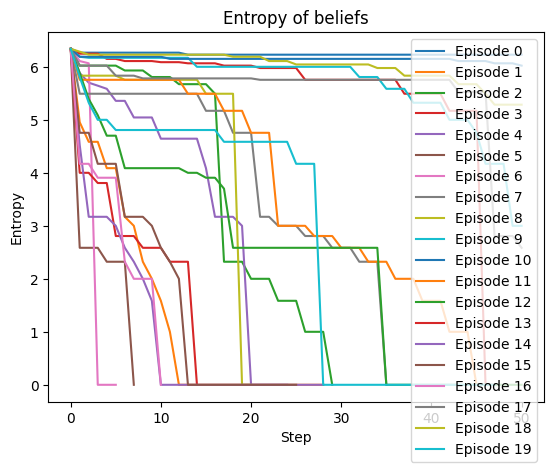

In [8]:
all_data(transitions, beliefs, path="plots/Thompson")

In [24]:
env.set_rendering()
while True:
    try:
        env.render_bis()
    except:
        break

# DQN 

In [18]:
agent = DoubleDQNAgent(5,4)
agent.load("agents/double_dqn_maze_2_10deformations.pt")

/home/flaccagora/Desktop/RoboSurgery/src/agents/dqn.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.q_network.load_state_dict(torch.load(path))


In [19]:
eval_agent("POMDP",agent,env, num_episodes=1,max_episode_steps=25, render=True)

TypeError: b_theta_update() missing 1 required positional argument: 'observation'

In [5]:
def evaluate_agent_training(env : GridEnvDeform, agent : DoubleDQNAgent, num_episodes=10,render=False):
    total_rewards = []

    for episode in range(num_episodes):
        s, _ = env.reset()
        state = torch.tensor([item for sublist in s for item in sublist], dtype=torch.float32)
        
        obs = env.get_observation()

        b_0 = torch.ones(len(thetas)) / len(thetas)   
        b = b_theta_update(b_0,s[0], obs)
    
        episode_reward = 0
        done = False
        c = 25
        while not done and c > 0:
            # Render the environment
            if render:
                env.render()                                
            
            
            pos = s[0]
            theta = thetas[torch.argmax(b)]
            argmaxstate = (pos,theta)
            maxstate = torch.tensor([item for sublist in argmaxstate for item in sublist], dtype=torch.float32)

            # Agent takes an action using a greedy policy (without exploration)
            action = agent.choose_deterministic_action(maxstate)
            next_state, reward, done, _, info = env.step(action,s,execute=render)

            next_obs = env.get_observation(next_state)
            s = next_state

            b_prime = b_theta_update(b,s[0], next_obs)
            b = b_prime

            if render:
                print("State: ", s)
                print("Chosen action: ", action)
                print("Next state: ", next_state)
                print("argmaxstate", argmaxstate)
                print("argmax and max Belief: ", thetas[torch.argmax(b_prime)], torch.max(b_prime))
                
            episode_reward += reward
            
            if done or c == 1:
                total_rewards.append(episode_reward)
                # print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward}")

            c -= 1
    avg_reward = np.mean(total_rewards)
    # print(f"Average Reward over {num_episodes} episodes: {avg_reward}")
    return avg_reward


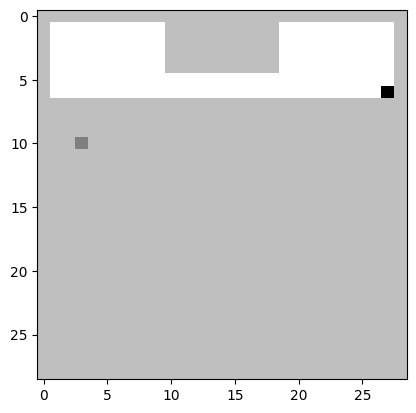

State:  ((9, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((9, 3, 0), (9, 2))
argmaxstate ((10, 3, 0), (1, 1))
argmax and max Belief:  (1, 1) tensor(0.0556)


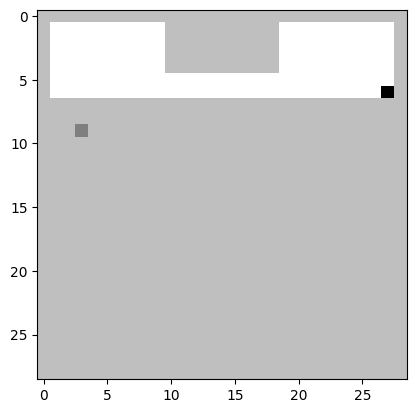

State:  ((8, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((8, 3, 0), (9, 2))
argmaxstate ((9, 3, 0), (1, 1))
argmax and max Belief:  (1, 1) tensor(0.0556)


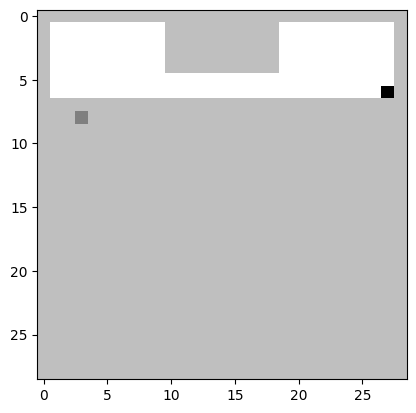

State:  ((7, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((7, 3, 0), (9, 2))
argmaxstate ((8, 3, 0), (1, 1))
argmax and max Belief:  (2, 2) tensor(0.1250)


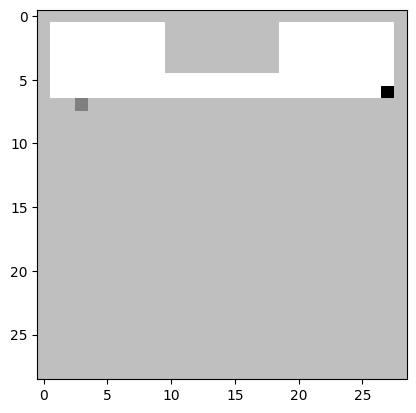

State:  ((6, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((6, 3, 0), (9, 2))
argmaxstate ((7, 3, 0), (2, 2))
argmax and max Belief:  (2, 2) tensor(0.1250)


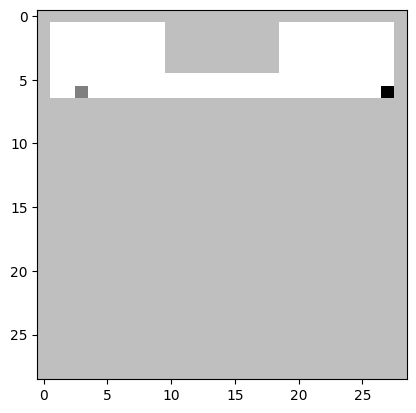

State:  ((5, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((5, 3, 0), (9, 2))
argmaxstate ((6, 3, 0), (2, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


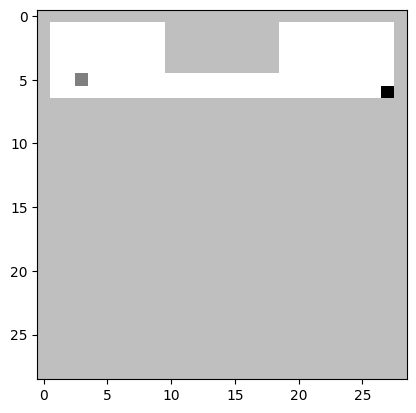

State:  ((4, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((4, 3, 0), (9, 2))
argmaxstate ((5, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


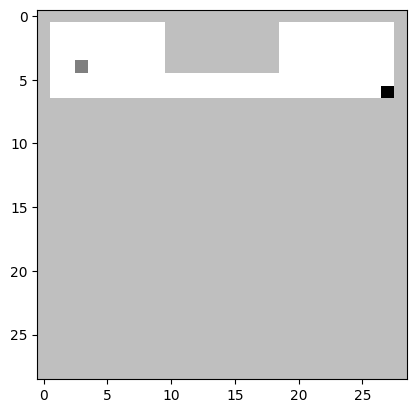

State:  ((3, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((3, 3, 0), (9, 2))
argmaxstate ((4, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


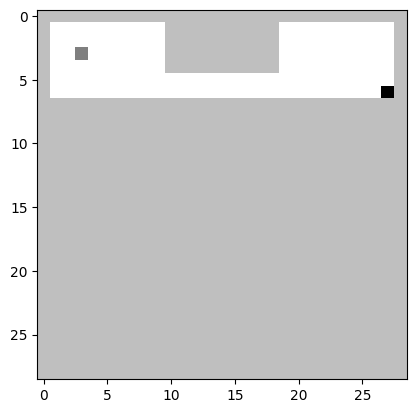

State:  ((2, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((2, 3, 0), (9, 2))
argmaxstate ((3, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


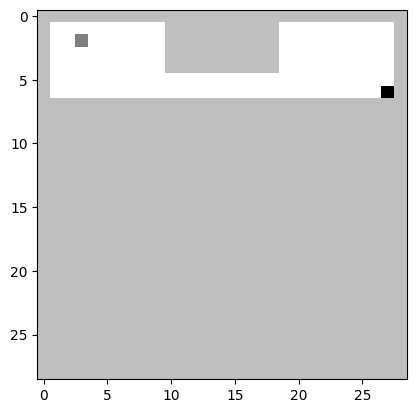

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((2, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


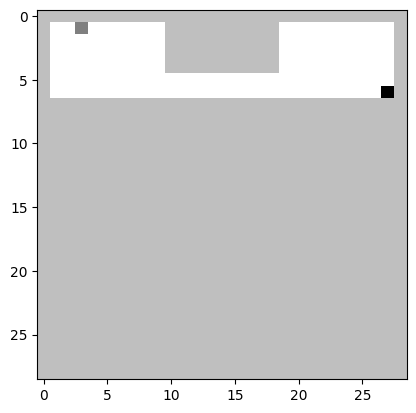

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


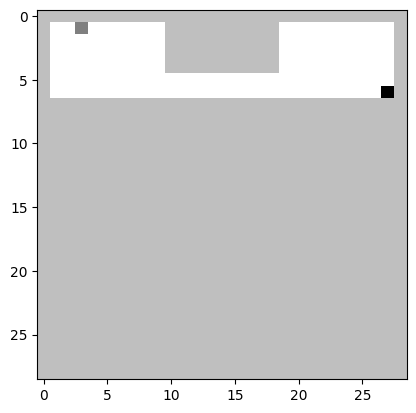

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


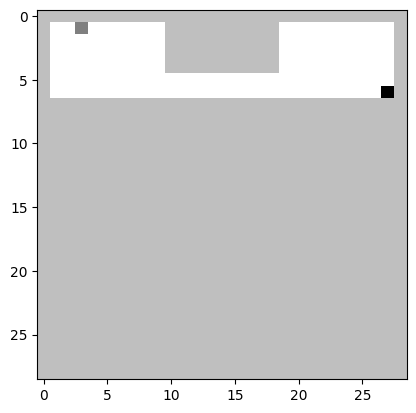

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


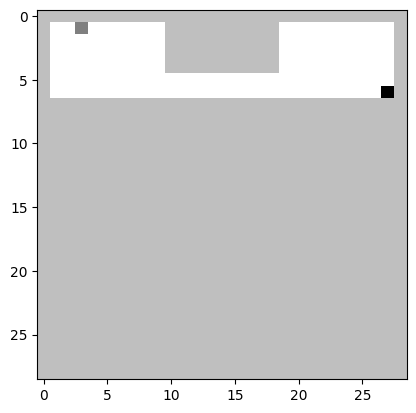

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


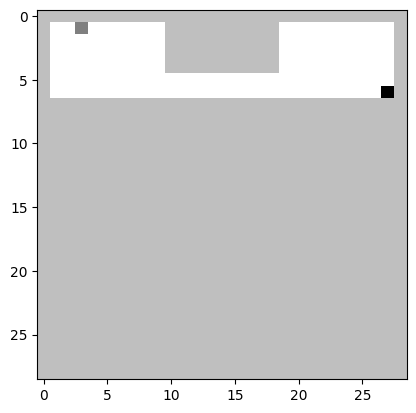

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


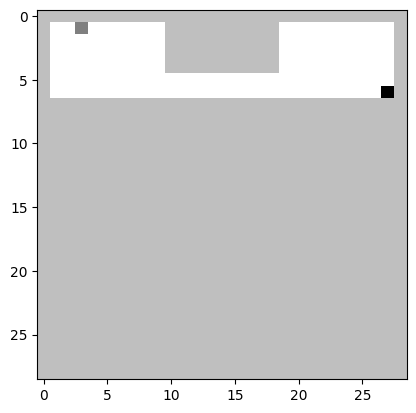

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


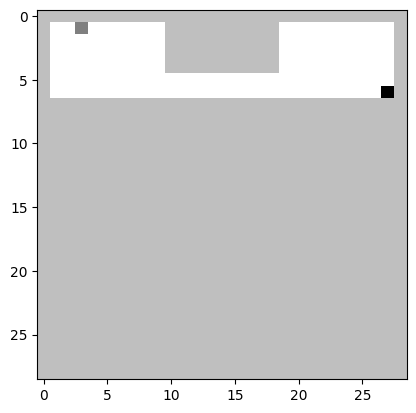

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


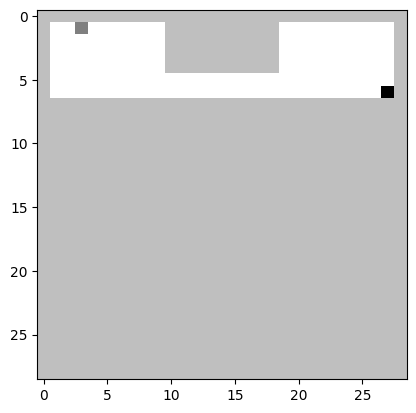

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


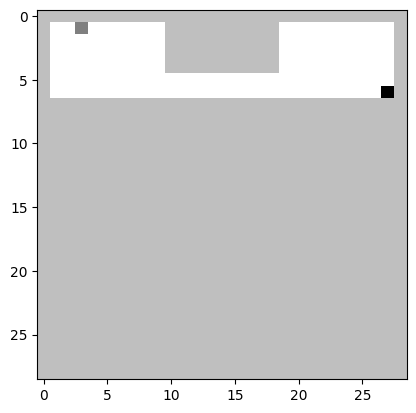

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


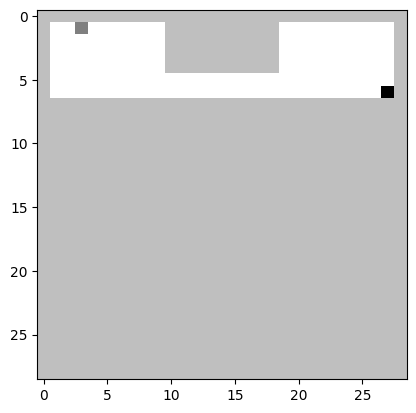

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


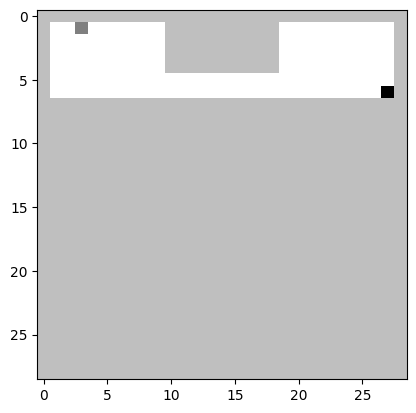

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


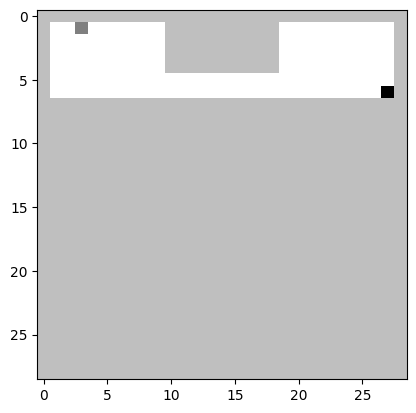

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


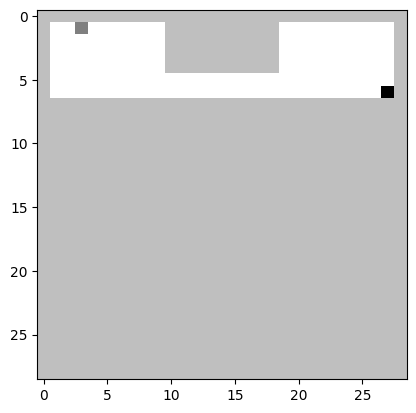

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


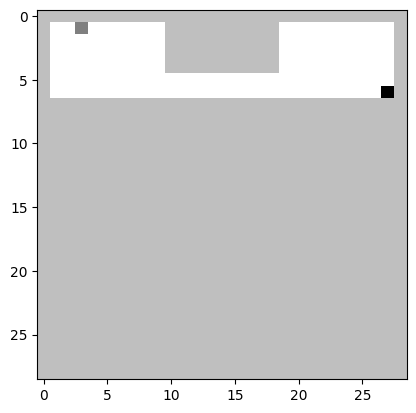

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


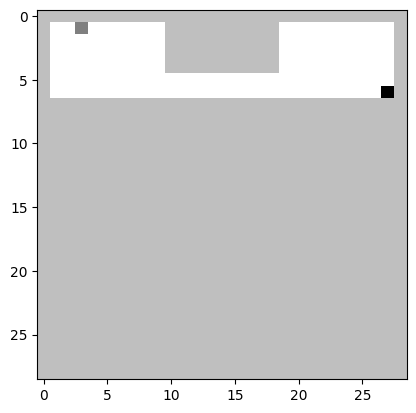

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


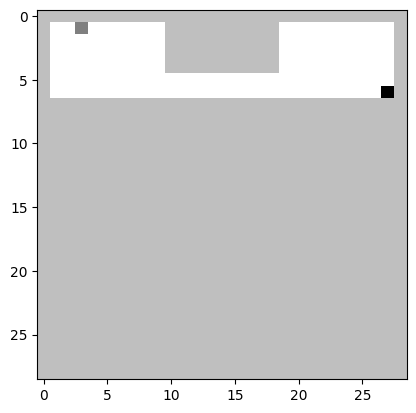

State:  ((1, 3, 0), (9, 2))
Chosen action:  0
Next state:  ((1, 3, 0), (9, 2))
argmaxstate ((1, 3, 0), (4, 2))
argmax and max Belief:  (4, 2) tensor(0.1667)


np.float64(-25.0)

In [6]:
evaluate_agent_training(env, agent,1,render=True)
